# Base System: Basic framework
This tutorial is meant to introduce the very basic functionality of the comfit Python package. 

The class underlying everything is the class called "BaseSystem". Every other model (classes located in the ./models/ folder) are subclasses of BaseSystem. 

If you have not already, start by installing the comfit package. 

In [4]:
!pip install comfit -q


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


We start by importing the package.

In [2]:
import comfit as cf

Now we can define a system with a given dimension and resolution

In [6]:
sys1 = cf.BaseSystem(1,xRes=11)

sys1 is now an instance of the `BaseSystem` class and contains a number of useful parameters and functions. 
We can always see the current state of the system by printing the instance.

In [7]:
print(sys1)

System Dimension: 1
X-Axis Limits: [0, 11.0], Resolution: 11, Delta: 1.0
Current Time: 0, Time Step: 0.1


Now, we can try to do some basic calculating and plotting

In [8]:
import numpy as np

<Axes: xlabel='$x/a_0$'>

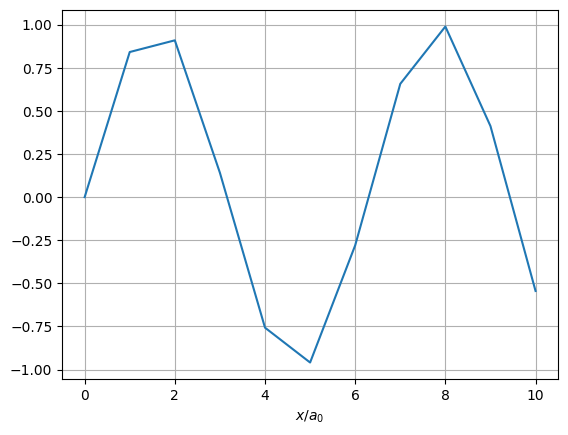

In [9]:
y = np.sin(sys1.x)
sys1.plot_field(y)

In many systems, there is an inherent length scale to the problem and displaying the plots with respect to this length scale makes sense. 
In ComFiT, this length scale is given by the property `a0`. 

Setting a property of a class instance is easy, just write 

```python
sys1.property = value
```

Now, set the property `a0` to $2\pi$ and remake the previous plot. 

<details>
<summary>Solution</summary>
<p>
<pre><code>
sys1.a0 = 2*np.pi
sys1.plot_field(y)
</code></pre>
</p>
</details>


By changing the length scale to $2\pi$, we get something that clearly shows the periodicity. 

In [10]:
sys1.plot_field(y)

The function looks quite jagged, which we can fix by increasing the resolution and decreasing the interspacing dx

In [11]:
sys2 = cf.BaseSystem(1,xRes=101,dx=0.1)

In [12]:
y2 = np.sin(sys2.x)
sys2.plot_field(y2)

Lets have a look at a 2D system and plot a 2D function

<Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>

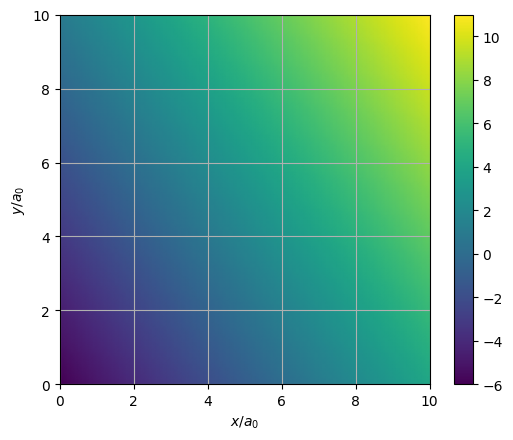

In [3]:
sys2 = cf.BaseSystem(2,xRes=101,dx=0.1,yRes=101,dy=0.1)
field = sys2.x-1 + 0.7*sys2.y-5
sys2.plot_field(field)

As you see, the x-array is stored as a $(xRes,1)$ array, while the y-array is stored as $(1,yRes)$. When doing calculations with arrays in this way, it is not necessary to create a meshgrid to produce a 2D matrix. 

## Exercise 1
Plot the function 
$$
f(x,y) = \sin(x+y)
$$

## Exercise 2
Plot the function 
$$
f(x,y,z) = exp(-(x^2 + y^2 + z^2))
$$

### Solution

<Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>

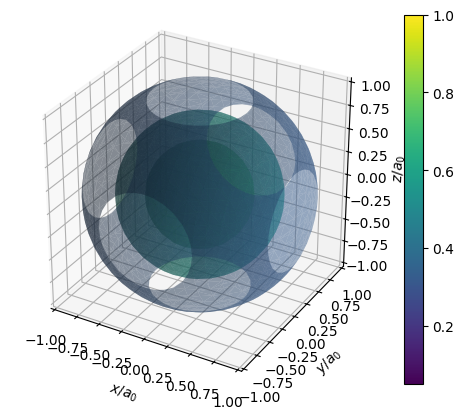

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

sys3 = cf.BaseSystem(3,
                     xRes=21,dx=0.1, xmin=-1,
                     yRes=21,dy=0.1, ymin=-1,
                     zRes=21,dz=0.1, zmin=-1)
f = np.exp(-sys3.x**2 - sys3.y**2 - sys3.z**2)
sys3.plot_field(f,number_of_layers=3)